In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#set up working directory
import io
%cd "C:\Users\gmahe\OneDrive\Desktop\ml"

C:\Users\gmahe\OneDrive\Desktop\ml


In [3]:
hrtrain=pd.read_csv("train.csv")

In [4]:
hrtest=pd.read_csv("test.csv")

In [5]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
hrtrain.education.value_counts(dropna=False)

education
Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: count, dtype: int64

In [7]:
hrtrain.education=hrtrain.education.fillna(hrtrain.education.value_counts().idxmax())
#idxmax() will index of max freq in value_counts() table

In [8]:
hrtest.education=hrtest.education.fillna(hrtest.education.value_counts().idxmax())

In [9]:
hrtrain.previous_year_rating.value_counts(dropna=False)

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: count, dtype: int64

In [10]:
hrtrain.previous_year_rating=hrtrain.previous_year_rating.fillna(hrtrain.previous_year_rating.value_counts().idxmax())
#or hrtrain.previous_year_rating=hrtrain.previous_year_rating.fillna(3.0)

In [11]:
hrtest.previous_year_rating=hrtest.previous_year_rating.fillna(hrtest.previous_year_rating.value_counts().idxmax())

In [12]:
hrtest.previous_year_rating.value_counts(dropna=False)

previous_year_rating
3.0    9733
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: count, dtype: int64

In [13]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [14]:
#Split Data into numcols and objects

numcols=hrtrain[['no_of_trainings','age','length_of_service','avg_training_score']]

objectcols=hrtrain[['department','region','education','gender','recruitment_channel','previous_year_rating','KPIs_met >80%','awards_won?','is_promoted']]

In [15]:
# Eda on numeric data - describe(), skew(),kurt() - Univariate stats
#Histogram,Boxplot and Density Curve - avg_training_score- Univariate plots
#Correlation and Heatmap - numcols - Bivariate Stats & plots
numcols.describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,5.865512,63.386750
std,0.609264,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


In [16]:
print(numcols.skew())

no_of_trainings       3.445434
age                   1.007432
length_of_service     1.738061
avg_training_score    0.451908
dtype: float64


In [17]:
print(numcols.kurt())

no_of_trainings       18.740082
age                    0.792353
length_of_service      4.414031
avg_training_score    -1.049649
dtype: float64


In [18]:
import seaborn as sns

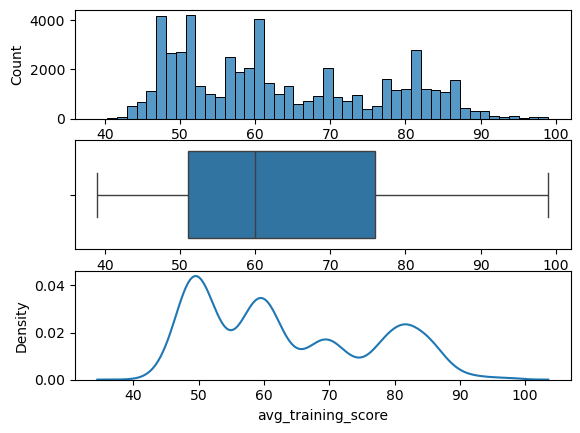

In [19]:
#Histogram,Boxplot and Density Curve - avg_training_score- Univariate plots
fig,ax=plt.subplots(3,1) # Break Plot window into 3 rows & 1 column
sns.histplot(hrtrain.avg_training_score,ax=ax[0]) # Histogram
sns.boxplot(hrtrain.avg_training_score,ax=ax[1],orient="h") # Boxplot - Horizontal
sns.kdeplot(hrtrain.avg_training_score,ax=ax[2])# density curve
plt.show()

<Axes: >

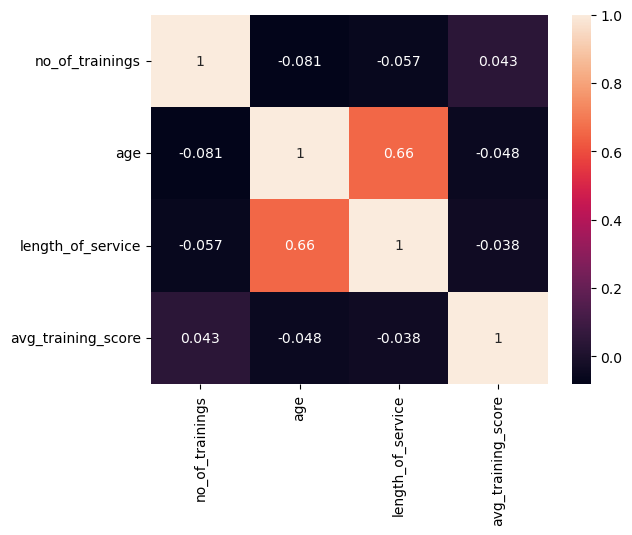

In [20]:
sns.heatmap(numcols.corr(),annot=True)

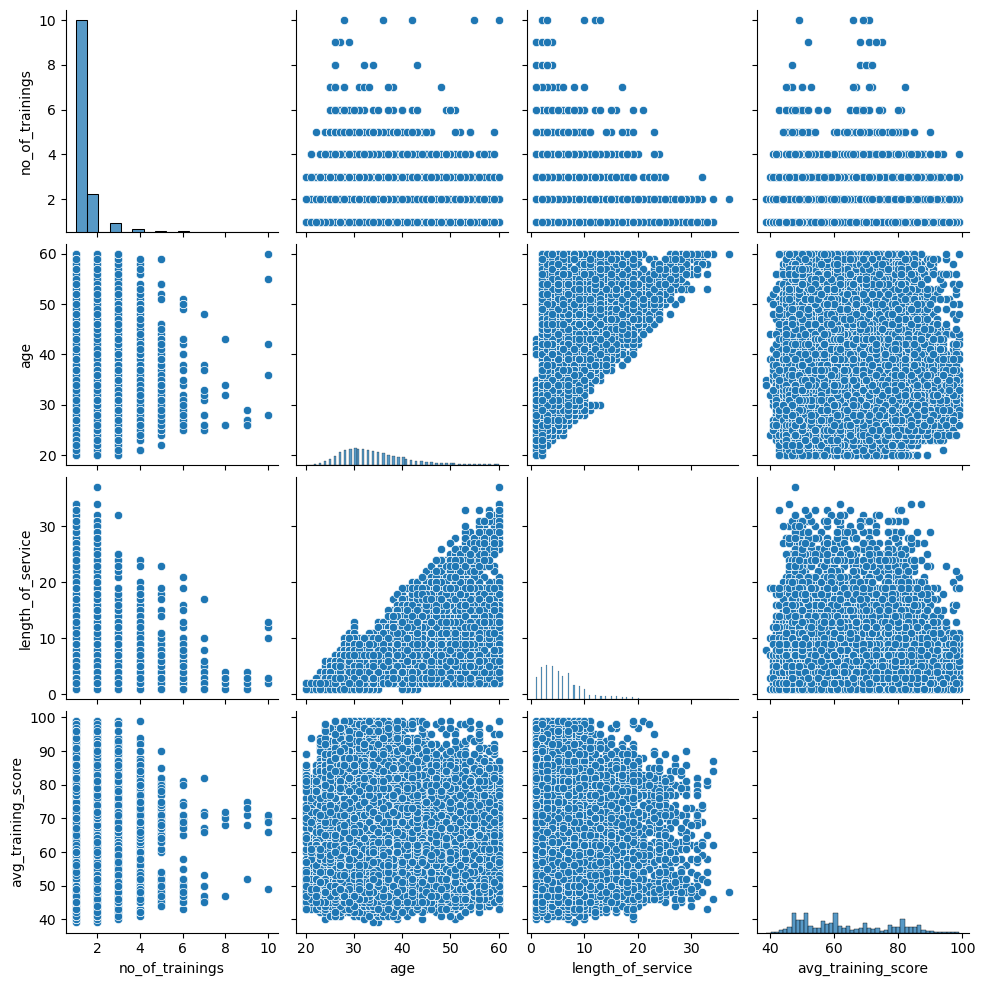

In [21]:
sns.pairplot(numcols)  # Bivariate , histogram + scattered plot

In [22]:
#Frequency Counts of all object cols
for col in objectcols.columns:
    freq=objectcols[col].value_counts()
    print(freq)

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64
education
Bachelor's          39078
Maste

In [23]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [24]:
# What is the ave avg_training_score for diff gender
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [25]:
# What is the ave avg_training_score for diff kpismet
hrtrain.avg_training_score.groupby(hrtrain['KPIs_met >80%']).mean()

KPIs_met >80%
0    62.614241
1    64.809030
Name: avg_training_score, dtype: float64

In [26]:
# What is the ave avg_training_score for diff recruitment channel?
hrtrain.avg_training_score.groupby(hrtrain.recruitment_channel).mean()

recruitment_channel
other       63.362839
referred    66.182137
sourcing    63.280620
Name: avg_training_score, dtype: float64

In [27]:
# What is the ave Length_of_service for diff edu
hrtrain.length_of_service.groupby(hrtrain.education).mean()

education
Bachelor's          5.286760
Below Secondary     1.704348
Master's & above    7.605293
Name: length_of_service, dtype: float64

In [28]:
# What is the ave Length_of_service for diff department
hrtrain.length_of_service.groupby(hrtrain.department).mean()

department
Analytics            4.932735
Finance              4.819401
HR                   5.683623
Legal                4.599615
Operations           6.416020
Procurement          6.331045
R&D                  4.554555
Sales & Marketing    5.912292
Technology           5.914822
Name: length_of_service, dtype: float64

In [29]:
# What is the ave avg_training _score for diff department
hrtrain.avg_training_score.groupby(hrtrain.department).mean()

department
Analytics            84.602952
Finance              60.222003
HR                   50.018197
Legal                59.868142
Operations           60.226648
Procurement          70.122443
R&D                  84.596597
Sales & Marketing    50.261698
Technology           79.928692
Name: avg_training_score, dtype: float64

In [30]:
# Test null avg avg_training_score for diff gender equal
#split , frame and null, conduct test & Interpret
#Exactly 2 Levels/classes - 2 sample Independent T test

hrtrain.avg_training_score.groupby(hrtrain.gender).mean()


#Null- There is no significant diff in avg avg_training_score of male&Female 
#alt- There is significant diff in avg avg_training_score of male&Female 

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [31]:
Male=hrtrain[hrtrain.gender=='m']
Female=hrtrain[hrtrain.gender=='f']

In [32]:
from scipy.stats import ttest_ind

In [33]:
ttest_ind(Male.avg_training_score,Female.avg_training_score,equal_var=False)
#Since pvalue=9.321257169457854e-10 is less than 0.05,Reject null

TtestResult(statistic=-6.122262326710494, pvalue=9.321257169457854e-10, df=35820.249659813104)

In [34]:
# Test null avg avg_training_score for diff recrutment
hrtrain.avg_training_score.groupby(hrtrain.recruitment_channel).mean()

recruitment_channel
other       63.362839
referred    66.182137
sourcing    63.280620
Name: avg_training_score, dtype: float64

In [35]:
Other=hrtrain[hrtrain.recruitment_channel=='other']
Referred=hrtrain[hrtrain.recruitment_channel=='referred']
Sourcing=hrtrain[hrtrain.recruitment_channel=='sourcing']

In [36]:
from scipy.stats import f_oneway

In [37]:
f_oneway(Other.avg_training_score,Referred.avg_training_score,Sourcing.avg_training_score)
#Since pvalue=6.585805990029605e-12ss is less than 0.05,Reject null

F_onewayResult(statistic=25.758203095600134, pvalue=6.585805990029605e-12)

In [38]:
pd.crosstab(hrtrain.gender,hrtrain.is_promoted)

is_promoted,0,1
gender,,
f,14845,1467
m,35295,3201


In [39]:
# test Null no association between gender and is_promoted 
# Both variables non numeric categorical -chi square test of independence
# null- there is no association btween both variables
# alt - there is association between both variables
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(hrtrain.gender,hrtrain.is_promoted))

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428,  1389.29382572],
       [35217.29382572,  3278.70617428]]))

In [40]:
objectcols.head()

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,5.0,1,0,0
1,Operations,region_22,Bachelor's,m,other,5.0,0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,3.0,0,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,1.0,0,0,0
4,Technology,region_26,Bachelor's,m,other,3.0,0,0,0


In [41]:
objectcols_dummy=pd.get_dummies(objectcols,columns=['department','region','education','gender','recruitment_channel','previous_year_rating','KPIs_met >80%','awards_won?'])

In [42]:
objectcols_dummy.head()

,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,...,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,0,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,True,True,False
1,0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
2,0,False,False,False,False,False,False,False,True,False,...,True,False,False,True,False,False,True,False,True,False
3,0,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
4,0,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,True,False


In [43]:
# concatinate numcols & objcols_dummy
hrtrain_df=pd.concat([numcols,objectcols_dummy],axis=1)

In [44]:
#split data into dependent variable(y) & indepenedent variables(X's)
y=hrtrain_df.is_promoted
x=hrtrain_df.drop("is_promoted",axis=1)

In [45]:
# labelencode dependent variables
from sklearn.preprocessing import LabelEncoder


In [46]:
y=LabelEncoder().fit_transform(y)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logical=LogisticRegression(max_iter=2000)


In [49]:
logicalmodel=logical.fit(x,y)

In [50]:
logicalmodel.score(x,y) # accuracy from confusion matrix

0.9315610859728507

In [51]:
logicalmodel.intercept_

array([-6.30922062])

In [52]:
logitperdict=logicalmodel.predict(x)

In [53]:
pd.crosstab(y,logitperdict)

col_0,0,1
row_0,,
0,49850,290
1,3461,1207


In [54]:
promoted_residual=y-logitperdict

In [55]:
np.sqrt(np.mean(np.square(promoted_residual)))

0.26160832178497173

In [56]:
(49850+1207)/(49850+290+3461+1207)

0.9315610859728507

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y,logitperdict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     50140
           1       0.81      0.26      0.39      4668

    accuracy                           0.93     54808
   macro avg       0.87      0.63      0.68     54808
weighted avg       0.92      0.93      0.92     54808



In [58]:
#  supervised Learning - classfication Algorithms used when dependent variable (y) is 
# non numerical and binary or multinomial (more than 2 levels/classes)

# Binary logistic regression explains relationship between a binary dependent variable(y)
#  and multiple independent variable(x's) non linear relationship as distribution 
#  is s shaped binary logistic regression  is on eqution
#   exp^B0+B1+B3+B3+......BnXn
# p=....................................
#   1+exp^B0+B1X1+B2X2.......BnXn
#  p-probablity that lies between 0 and 1 . predicted probablity is outcome of eqution 
#  exp -exponentiol or 2.178
#  bo - intercept or constant
# B1 B2 B3 ....Xn - independent variable 

#  classfication Rule
#  predicted probablity greater than equal to>=0.50 ... 1 or yes
#  predicted probablity less than <0.50 .... 0 or NO

#  Binary logistic regression  is a parametric algorithm .parametric algorithms have 
# assumptions that need to be met
#  1) dependent variables(y) must be binary or 0/1 or yes/no or True/False
#  2) independent variables(X's) can be both numaric and non numaric  or categorical
#  3) there must  be a logical relationship b/w dependent variable and independent variable 
#  4) no multicollinearity 
#  5) sample size musst be minimum 50 observations per variable.

#  interpretation of output is based on confusion matrix
# confusion matrix is 2*2 matrix or crosstableation or actual class & predicted class
# prdicted class is genrated from predicted probablity
#  primary matric is accuracy
#                    Tp+TN
#  accuracy=...........................................
#                      Tp+Fn+Tn+FP
#   Sensitivity or recall =(TP/(TP+FN)
#   Specificity  = TN/(TN+FP)
#  precission = TP/(TP+FP)
#  f1 Score = 2* (precisson * recall/pression+recall)
#  All metrics must be b/w 0.70 to 0.95
#  less than 0.70 fitting 
#  greater than 0,95 unfitting

In [59]:
# AUC Curve - A receiver operating characteristic curve, or ROC curve, is a graphical
# plot that shows the performance of a binary classifier model at different threshold.
# The ROC curve is the plot of the true positive rate (TPR) against the false positive
# rate (FPR) at each threshold setting.
# AUC above 0.70 is a good fit model

In [60]:
from sklearn.metrics import RocCurveDisplay


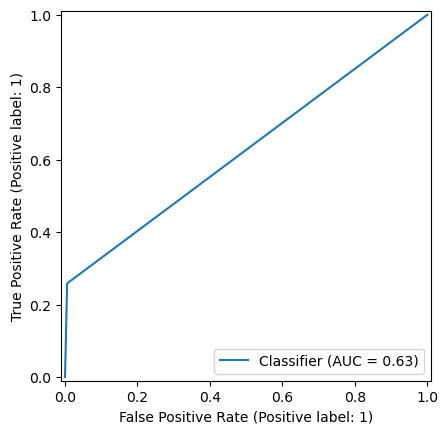

In [61]:
RocCurveDisplay.from_predictions(y,logitperdict) # AUC 0.63 - not a good fit curve

In [62]:
#  Regression models fail due tpo skewness, kurtisis  and outliears dependent variable(y)
#  classfication  models fail due to imblance data or class/level inblance in dependent variable(y)
#  imblance data is where one class/level for higher than other class/level
#  in HR Analytics data dependent variable (y) is is_promoted .0(50140) & 1(4668)
#  0 is majority Class (50140) and 1 is minorty class (4668)

<Axes: xlabel='is_promoted'>

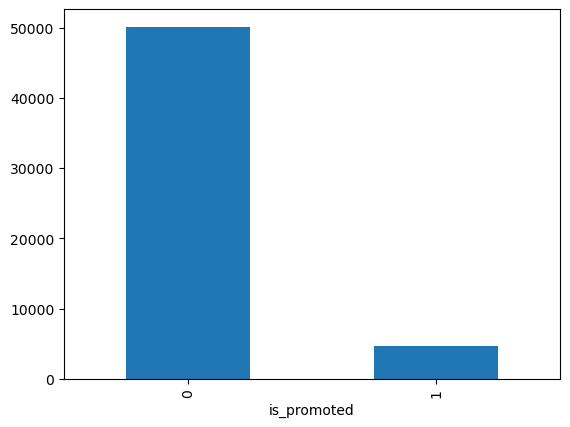

In [63]:
hrtrain.is_promoted.value_counts().plot(kind="bar")

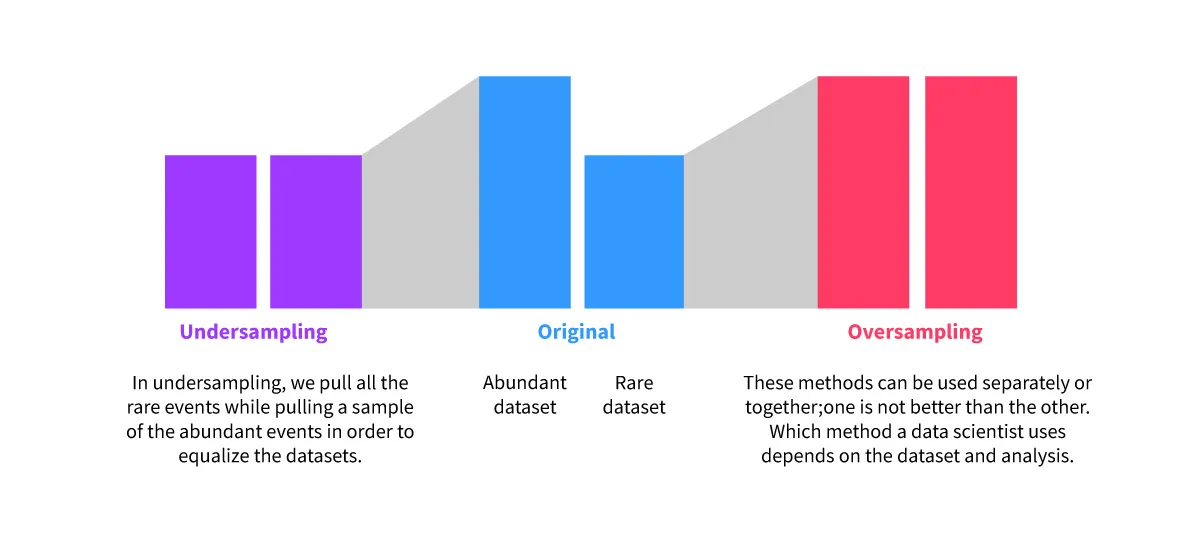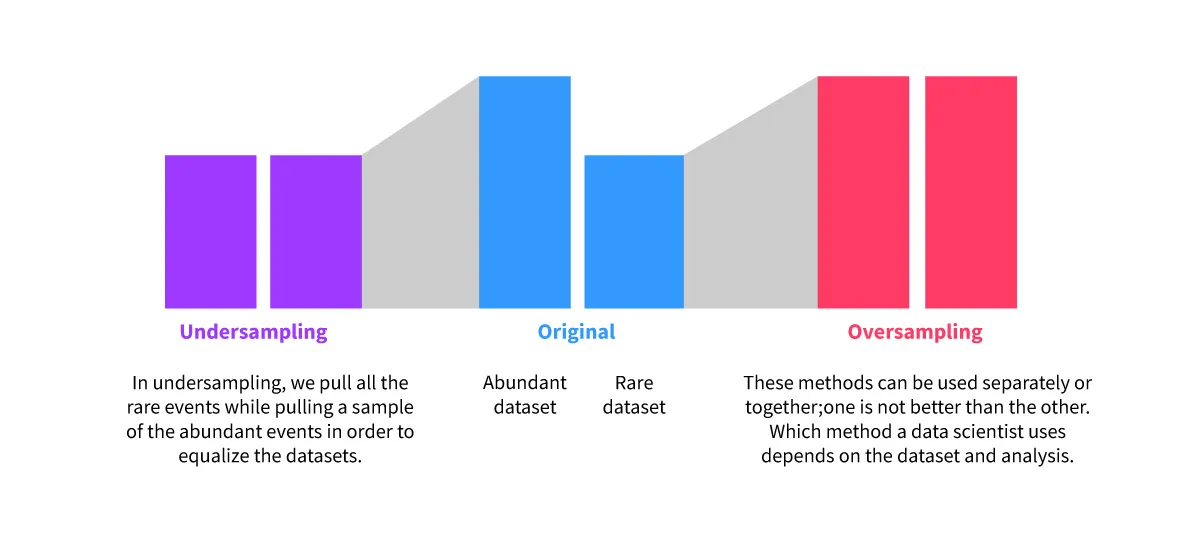


In [64]:
 from sklearn.tree import DecisionTreeClassifier

In [65]:
tree=DecisionTreeClassifier()


In [66]:
treemodel=tree.fit(x,y)

In [67]:
treemodel.score(x,y)

0.999744562837542

In [68]:
# overfitting is accuracy or R Square on train model will be closer to 1.
# but upon Cross validation or repeated testing with randomly selected samples same data 
#data accuracy or R Square will fall or less than or close to #
# 0.60

# whenever Decision tree models are run Cross valiadation must be done to check for overfitrting
# if overfitting is found reduce max_depth=
# train model metrices and cross validation metrices must be closer typically +-10% range

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cross_val_score(tree,x,y,cv=5)

array([0.90102171, 0.89673417, 0.8994709 , 0.89873187, 0.89781954])

In [71]:
np.mean([0.90038314, 0.89819376, 0.89992702, 0.89891433, 0.89964419])

0.8994124880000001

In [72]:
treemodel2=DecisionTreeClassifier(max_depth=8).fit(x,y)


In [73]:
treemodel2.score(x,y)

0.935994745292658

In [74]:
cross_val_score(treemodel2,x,y,cv=5)# train Accuracy & Cross validation average
# Accuarcy are close hence stable model


array([0.93550447, 0.93413611, 0.93386243, 0.93549859, 0.93431256])

In [75]:
treepredict=treemodel2.predict(x)


In [76]:
pd.crosstab(y,treepredict)# confusion matrix

col_0,0,1
row_0,,
0,50121,19
1,3489,1179


In [77]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     50140
           1       0.98      0.25      0.40      4668

    accuracy                           0.94     54808
   macro avg       0.96      0.63      0.68     54808
weighted avg       0.94      0.94      0.92     54808



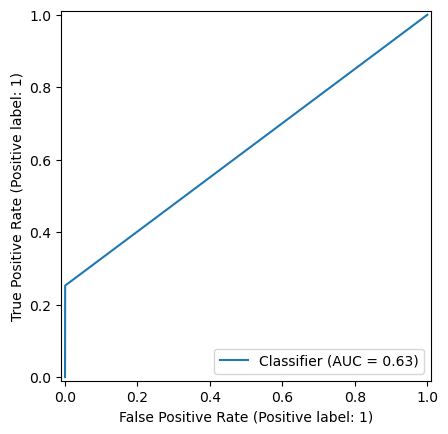

In [78]:
RocCurveDisplay.from_predictions(y,treepredict)

In [79]:
from sklearn.tree import plot_tree

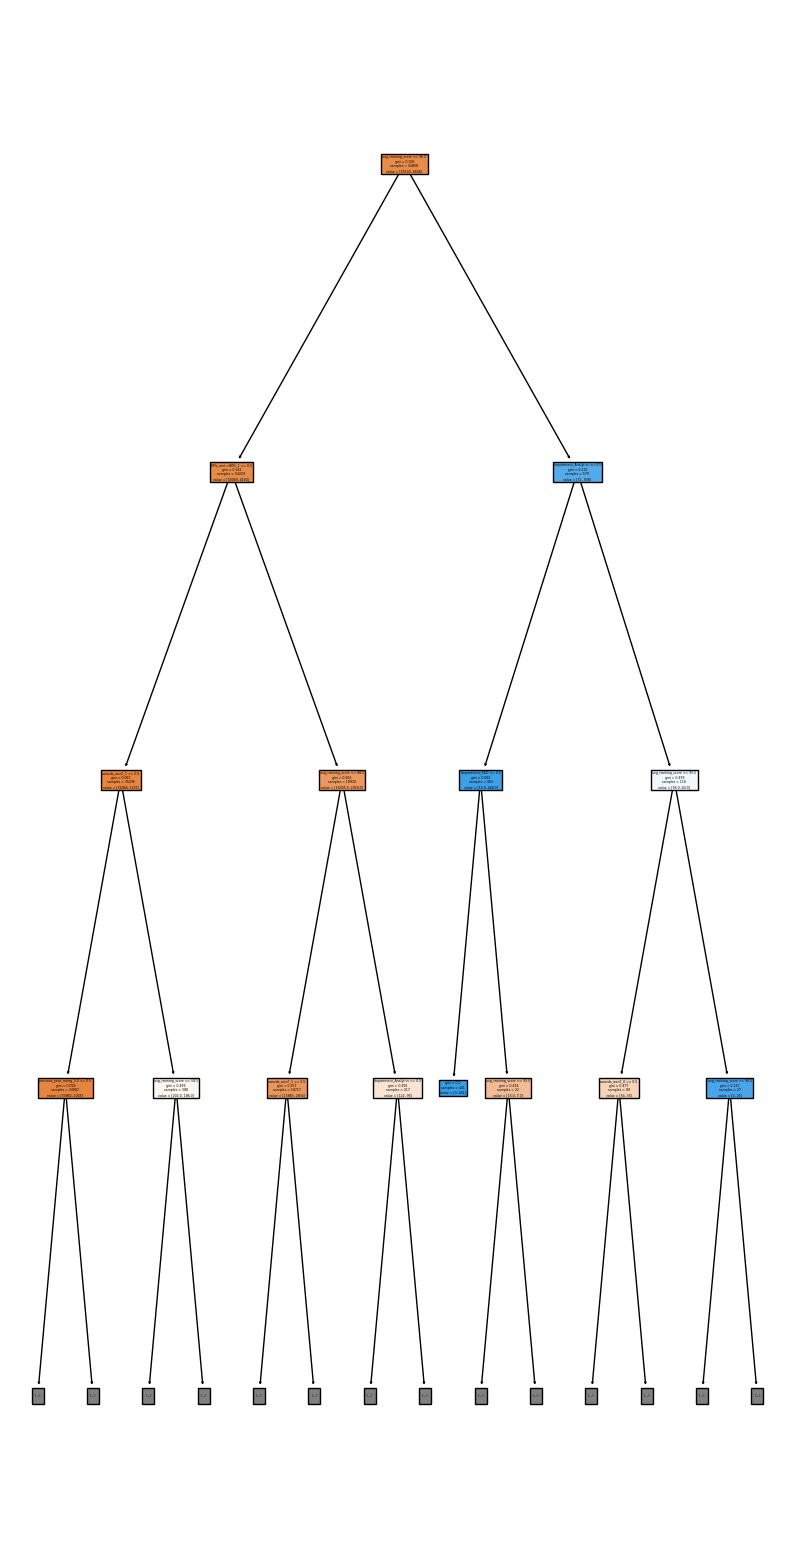

In [80]:
plt.figure(figsize=(10,20))
plot_tree(treemodel2,feature_names=x.columns,max_depth=3,filled=True)
plt.show()

In [81]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
   
    def recurse(node, path, paths):
       
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
           
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
   
    rules = []
    for path in paths:
        rule = "if "
       
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
       
    return rules

In [82]:

rules = get_rules(treemodel2,x.columns,y)
for r in rules:
    print(r)

if (avg_training_score <= 90.5) and (KPIs_met >80%_1 <= 0.5) and (awards_won?_1 <= 0.5) and (previous_year_rating_5.0 <= 0.5) and (avg_training_score <= 59.5) and (avg_training_score <= 57.5) and (avg_training_score <= 54.5) then class: 0 (proba: 100.0%) | based on 11,658 samples
if (avg_training_score <= 90.5) and (KPIs_met >80%_1 <= 0.5) and (awards_won?_1 <= 0.5) and (previous_year_rating_5.0 <= 0.5) and (avg_training_score > 59.5) and (department_Sales & Marketing <= 0.5) and (department_HR <= 0.5) and (avg_training_score > 68.5) then class: 0 (proba: 96.38%) | based on 10,296 samples
if (avg_training_score <= 90.5) and (KPIs_met >80%_1 <= 0.5) and (awards_won?_1 <= 0.5) and (previous_year_rating_5.0 <= 0.5) and (avg_training_score > 59.5) and (department_Sales & Marketing <= 0.5) and (department_HR <= 0.5) and (avg_training_score <= 68.5) then class: 0 (proba: 99.61%) | based on 5,071 samples
if (avg_training_score <= 90.5) and (KPIs_met >80%_1 > 0.5) and (avg_training_score <= 88

In [83]:
test_num=hrtest[['no_of_trainings','age','length_of_service','avg_training_score']]

In [84]:
test_object=hrtest[['department','region','education','gender','recruitment_channel','previous_year_rating','KPIs_met >80%','awards_won?']]

In [85]:
test_object_dummy=pd.get_dummies(test_object,columns=['department','region','education','gender','recruitment_channel','previous_year_rating','KPIs_met >80%','awards_won?'])

In [86]:
hrtest_df=pd.concat([test_num,test_object_dummy],axis=1)

In [87]:
hrtest_df.head()

,no_of_trainings,age,length_of_service,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_0,KPIs_met >80%_1,awards_won?_0,awards_won?_1
0,1,24,1,77,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,True,False
1,1,31,5,51,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
2,1,31,4,47,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
3,3,31,9,65,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,True,False
4,1,30,7,61,False,True,False,False,False,False,...,True,False,False,False,True,False,True,False,True,False


In [88]:
# Dependent variable predictions on test data using logstic Regression

In [89]:
test_logit_pred=logicalmodel.predict(hrtest_df)

In [90]:
pd.DataFrame(test_logit_pred).to_csv("LogisticReg.csv")

In [91]:
test_tree_pred=treemodel2.predict(hrtest_df)

In [92]:
pd.DataFrame(test_tree_pred).to_csv("DecisionTree.csv")

In [93]:
from sklearn.ensemble import RandomForestClassifier


In [94]:
Rfmodel=RandomForestClassifier(n_estimators=1000).fit(x,y)

In [95]:
Rfmodel.score(x,y)

0.999744562837542

In [96]:
Rf_pred=Rfmodel.predict(hrtest_df)

In [97]:
pd.DataFrame(Rf_pred).to_csv("RF1.csv")

machine learning supervised learning - tree based models- multi tree model- ensemble methods -1) bagging 2) bossting
bagging also called as bootstrap aggregating which is a sampling method sampling random Forest algorithm.
Most popular bagging algorithm is random forest, random refers to random sampling method and forest trefers to multiple trees.
random forest is both classification and Regression algorithm.
Random forest is an iterative algorithm which has multiple steps

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
gbmodel=GradientBoostingClassifier(n_estimators=2000).fit(x,y)

In [100]:
gbmodel.score(x,y)

0.9483469566486644

In [102]:
test_gbm=gbmodel.predict(hrtest_df)

In [103]:
pd.DataFrame(test_gbm).to_csv("(gbmhr.csv")